# ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
import numpy as np
import matplotlib.pyplot as plt

Loss: MSE - Mean Squared Error

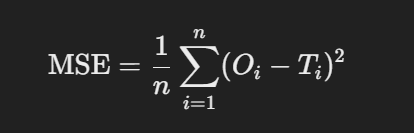

In [ ]:
def naive_mse(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_pred - y_true))

In [ ]:
model = Sequential([
    Dense(6, input_dim=1),
    LeakyReLU(alpha=0.05),
    Dense(1),
    LeakyReLU(alpha=0.05)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
model.compile(optimizer="adam", loss=naive_mse)

In [ ]:
x_train = np.array([-5.0], dtype=np.float32)
y_train = np.array([-208.0], dtype=np.float32)

X = tf.constant(x_train, dtype=tf.float32)
y_true = tf.constant(y_train, dtype=tf.float32)

In [ ]:
epochs = 100
learning_rate = 0.01
losses = []

for epoch in range(epochs):
  with tf.GradientTape() as tape:
    y_pred = model(X, training=True)
    loss = naive_mse(y_true, y_pred)

    gradients = tape.gradient(loss, model.trainable_variables)

    # Updating the weights
    for var, grad in zip(model.trainable_variables, gradients):
      var.assign_sub(learning_rate * grad)

  losses.append(loss.numpy())

prediction = model.predict(x_train)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


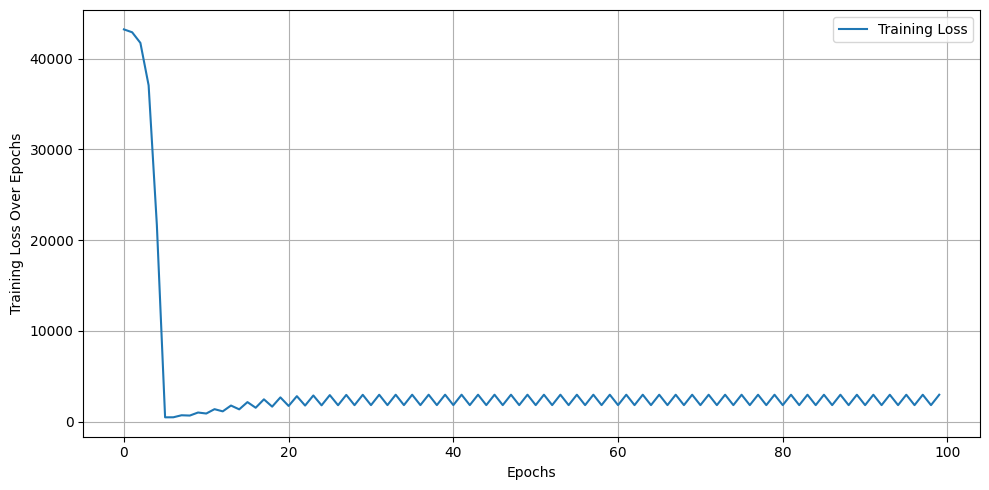

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Training Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

28X28 -> 32X32

In [ ]:
# Load MNIST dataset and adjust into 32X32
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2)), mode="constant")
x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2)), mode="constant")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 32, 32)

In [ ]:
x_train = x_train.reshape(-1, 32, 32, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 32, 32, 1).astype("float32") / 255.0

# One-hot: 2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
x_train.shape

(60000, 32, 32, 1)

In [ ]:
model_cnn = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation="relu", input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model_cnn.fit(x_train, y_train, validation_split=0.3, epochs=10, batch_size=32)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8554 - loss: 0.4775 - val_accuracy: 0.9698 - val_loss: 0.0971
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9785 - loss: 0.0673 - val_accuracy: 0.9777 - val_loss: 0.0721
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9859 - loss: 0.0452 - val_accuracy: 0.9806 - val_loss: 0.0649
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9881 - loss: 0.0387 - val_accuracy: 0.9835 - val_loss: 0.0597
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9898 - loss: 0.0307 - val_accuracy: 0.9867 - val_loss: 0.0480
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9927 - loss: 0.0216 - val_accuracy: 0.9867 - val_loss: 0.0466
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9945 - loss: 0.0165 - val_accuracy: 0.9856 - val_loss: 0.0511
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9953 - loss: 0.0145 -

In [ ]:
test_loss, test_acc = model_cnn.evaluate(x_test, y_test, verbose=2)
print(f"accuracy: {test_acc:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9827 - loss: 0.0579
accuracy: 0.9827


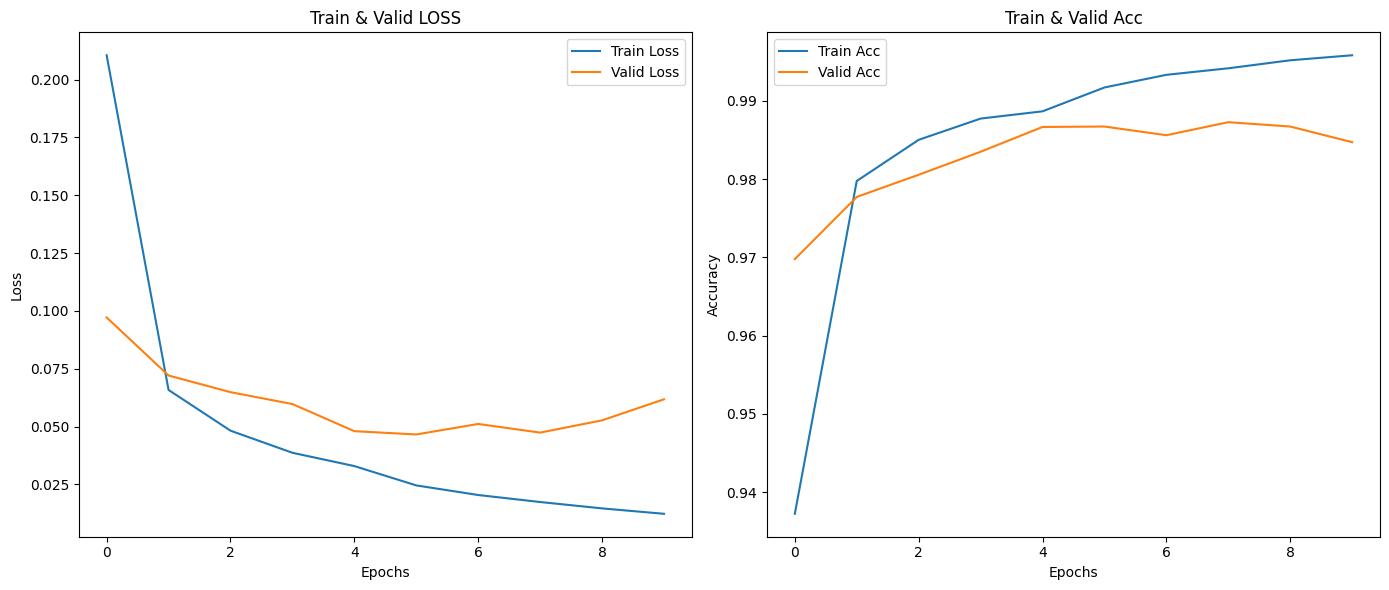

In [ ]:
# plot acc & loss curve
plt.figure(figsize=(14, 6))

# LOSS: Train VS. Valid
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Valid Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train & Valid LOSS")
plt.legend()

# ACC: Train VS. Valid
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Valid Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train & Valid Acc")
plt.legend()

plt.tight_layout()
plt.show()